# Third law of kepler using least square method on solar system data

By: Guido Salazar & Laura Sánchez (2024)

## Imports

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
from random import randint, random, uniform
import sympy as sym
from pprint import pprint
from mpl_toolkits.mplot3d import axes3d
from pprint import pprint

## Least Square Method

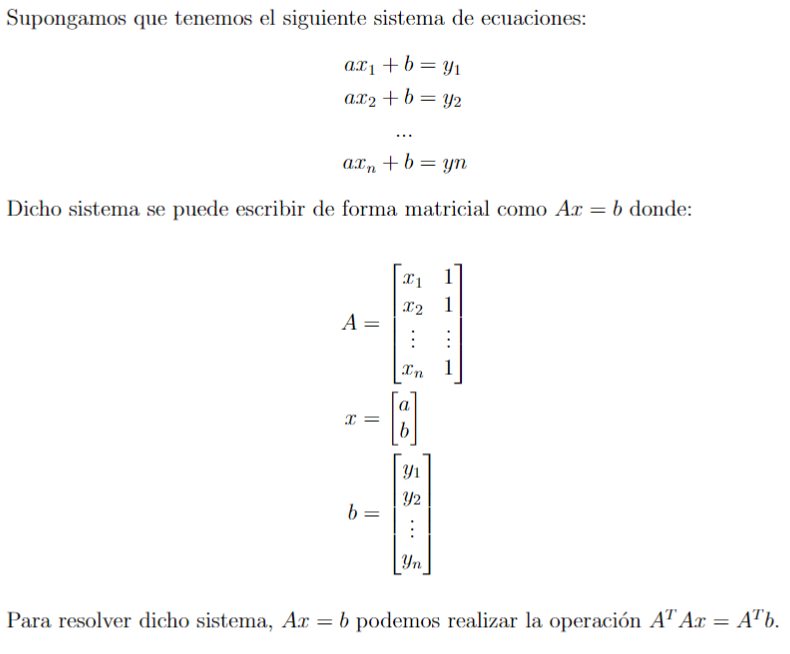

In [ ]:
def minimos_cuadrados(A, b):
  """
  Solucionar  el  sistema  de  ecuaciones  de  minimos  cuadrados  de  la  forma
  A^TAx = A^Tb usando la factorizaión QR. Asumiendo que se tienen dos incognitas
  Entradas: A: matrix 2xn de de la forma [[xi , 1] for i in range(x)]
            b: vector nx1 de la fomra [yi for i in range(y)]
  Salidas: x: 2x1 con los valores que mejor acomodan los errores cuadrados
  """
  #Resolver el sistemas de ecuaciones usando QR Ax=b => QRx=b => Rx = Q^{-1}b => Rx = Q^Tb
  A1 = np.dot(np.transpose(A), A)
  b = np.dot(np.transpose(A), b)
  Q,R = np.linalg.qr(A1) # qr decomposition of A
  QT = np.transpose(Q)
  y = np.dot(QT, b)
  x = np.linalg.solve(R, y)
  return x

## Gauss-Newton Método para mínimos cuadrados no lineales

El método de Gauss-Newton es un método iterativo para resolver problemas de mínimos cuadrados no lineales. La idea es que si tenemos un sistema de m ecuaciones con n incógnitas donde $r_i(c) = F(x_i, c) - y_i$ donde $x_i ∧ y_i$ son valores conocidos y c las incognitas. Se crea la función $r : R^n ⟶ R^m$ definidida como $r(c) = [r_1(c), r_2(c), ..., r_m(c)]$. De esto se obtiene la siguiente formula:

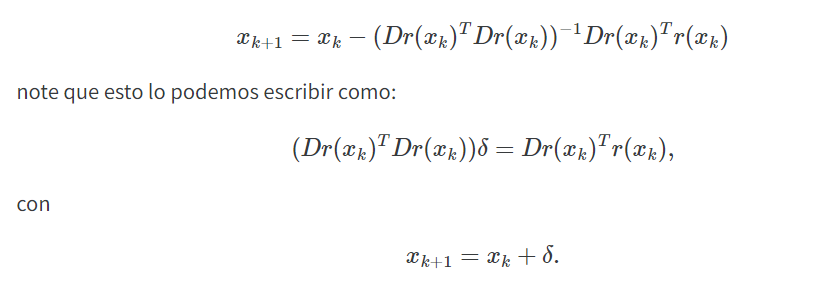

Donde Dr(x) es la jacobiana de la función r(c)

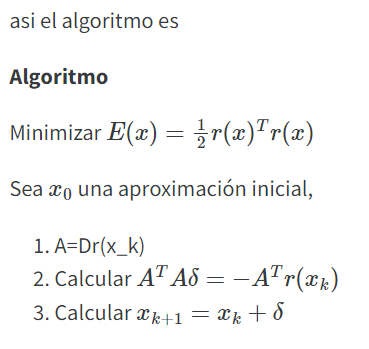



In [ ]:
def gauss_newton(f, x0, tol=0.0001, iter=50):
  """
  Función que calcula el cero de una función de Rn
  Entradas: f: Función en Rn
            x0: valor inicial
            tol: tolerancia
            iter: maximo de iteraciones
  Salida: ans: tupla con el valor obtenido y un mensaje en caso de que el metodo
               si converge, falla o no converge
  """
  simb_x = [sym.Symbol("x" + str(i)) for i in range(len(x0))] #Creación de variables simbolicas igual a la cantidad de elementos en el valor inicial
  mat = sym.Matrix(f(simb_x)) #sympy matrix para la función f de numpy
  JF = sym.lambdify([simb_x], mat.jacobian(simb_x)) #Hallar la jacobiana y transformarla en un array de numpy
  i, y, ans, flag = 0, x0, None, True #Creación del iterador, respuesta del metodo, salida, y una bandera por si el metodo falla
  delta = np.array([1 for _ in range(len(x0))])
  while np.linalg.norm(delta) >= tol and i < iter and flag: #Mientras el resultado cumpla con la tolerancia, o no se halla llegado al numero de iteraciones o la bandera sea cierta
    #Creación del sistema de ecuacions F(x0) = -JF(x0)(x1 - x0) => Ay = b
    A = JF(x0)
    temp = f(x0)
    b = -np.dot(np.transpose(A), temp)
    A = np.dot(np.transpose(A), A)
    A += 50*np.diag(np.diag(A))
    #Resolver el sistemas de ecuaciones usando QR Ax=b => QRx=b => Rx = Q^{-1}b => Rx = Q^Tb
    Q,R = np.linalg.qr(A) # qr decomposition of A
    QT = np.transpose(Q)
    y = np.dot(QT, b)
    delta = np.linalg.solve(R, y)
    x0 = np.array(delta + x0)
    i += 1
  print(f"finish {i} iteration")
  if i >= iter and flag: ans = (np.array(x0), "No encontrado")
  elif flag: ans = (np.array(x0), "Encontrado")
  return ans

## Tercera ley de kepler

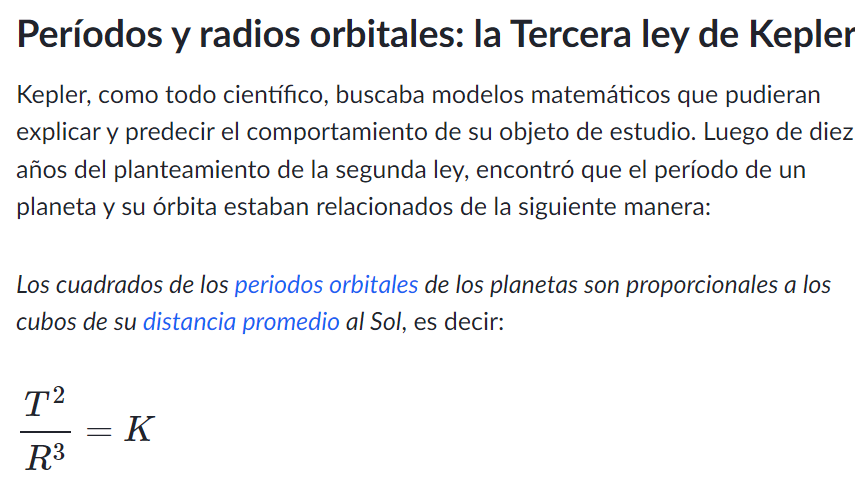

### Metodo de mínimos cuadrados aplicado a la tercera ley de kepler

La tercera ley de kepler estipula que

---

$$
\frac{T^2}{R^3} = K ⇒ T^2 = R^3 K
$$

---

Generalizando los parametros de la tercera ley de kepler se obtiene
$$
T^a = R^b K
$$
$$
⇒ T = k^\frac{1}{a}R^\frac{b}{a}
$$
$$
⇒ T = cR^\frac{b}{a}
$$
Por lo que usando le metodo de minimos cuadrados sobre los datos del sistema solar se quiere comprobar que la tercera ley de kepler es verdadera

Linealizando la ecuación usando logaritmos de tal manera que **Tl** = log(T), **Rl** = log(R) y C = log(c)

---

$$
\log(T) = \log(R^\frac{b}{a} c)
$$
$$
⇒ \log(T) = \frac{b}{a}\log(R) + \log(c)
$$
$$
⇒ Tl = \frac{b}{a}Rl + C
$$

---

### Datos

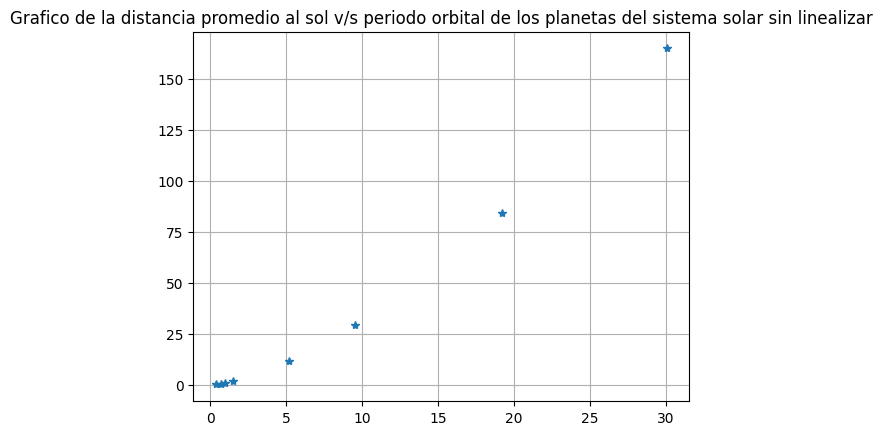

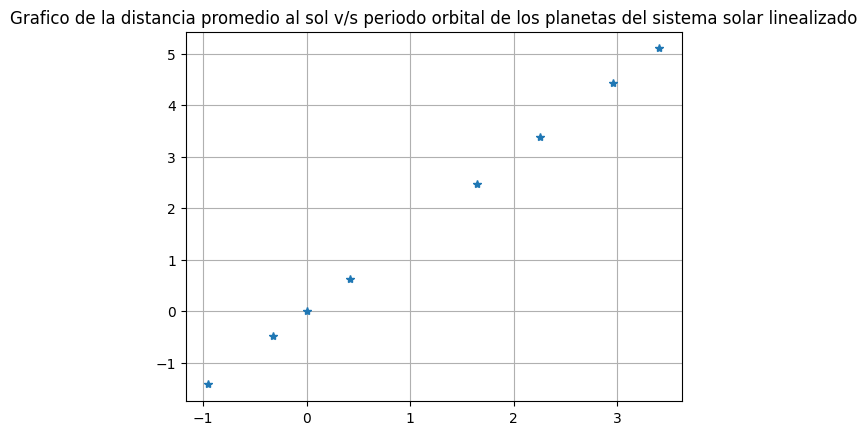

In [ ]:
T = np.array([0.2408467, 0.61519726, 1.0000174, 1.8808476, 11.862615, 29.447498, 84.016846, 164.79132])
R = np.array([0.387, 0.723, 1.000, 1.524, 5.203, 9.539, 19.182, 30.060])
plt.plot(R, T, '*')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar sin linealizar")
plt.grid()
plt.show()

Tl = np.log(T)
Rl = np.log(R)
plt.plot(Rl, Tl, '*')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar linealizado")
plt.grid()
plt.show()

### Minimos cuadrados

In [ ]:
A = np.array([[Rl[i], 1] for i in range(len(Rl))])
b = np.transpose(Tl)
K = 1.5
k = np.log(K)
x = minimos_cuadrados(A, b)
ab = x[0]
c = x[1]
print(f"a/b = {ab} | C = {c}")
print(f"Error: {(abs(ab-1.5)/1.5)*100}%")

a/b = 1.4998576225279825 | C = 0.00014879626838150593
Error: 0.009491831467833833


---

Como C = log(c) ≈ 0 ⇒ c = $e^0$ = 1, entonces la ecuación de kepler queda como

---

$$
T = R^\frac{b}{a}
$$

---

donde b/a ≈ 1.5 = 3/2. Reemplazando estos valores se obtiene que

---

$$
T = R^\frac{3}{2}
$$
$$
⇒ T^2 = R^3
$$

---

Logrando con datos reales del sistema Solar ver que la tercera ley de Kepler cumple con la igualdad. Obteniendo las siguentes graficas con los valores obtenidos.

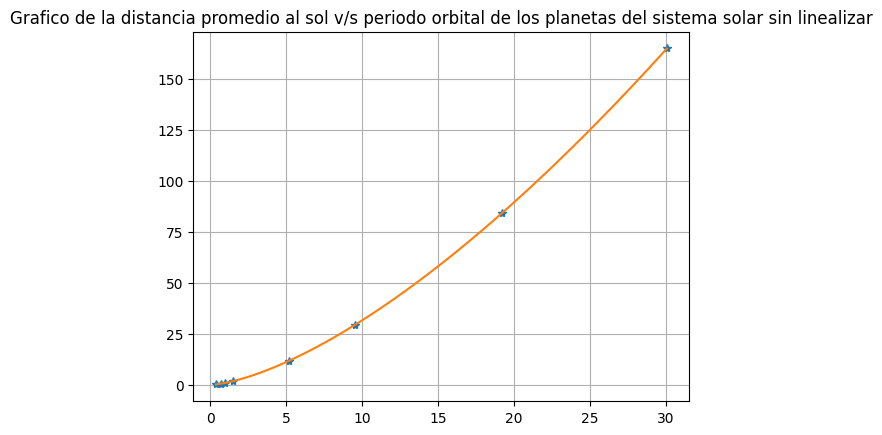

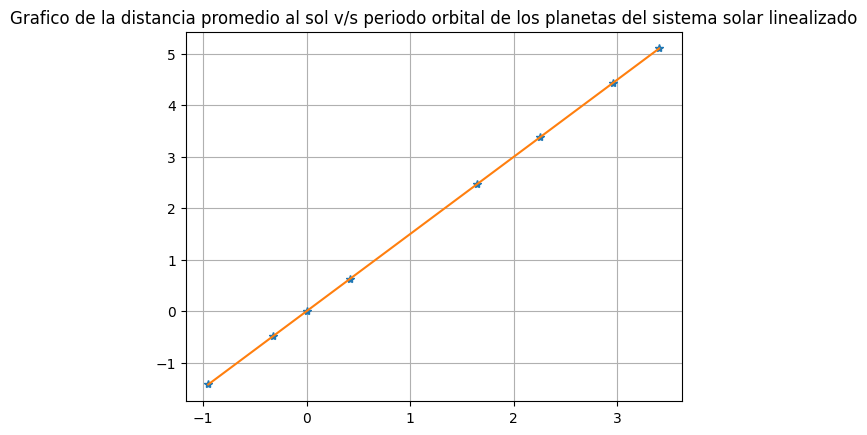

In [ ]:
g = lambda x: np.exp(c)*(x**ab)
xx = np.linspace(R[0], R[-1], 1000)
plt.plot(R, T, '*')
plt.plot(xx, g(xx), '-')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar sin linealizar")
plt.grid()
plt.show()

f = lambda x: ab*x + c
xx = np.linspace(Rl[0], Rl[-1], 1000)
plt.plot(Rl, Tl, '*')
plt.plot(xx, f(xx), '-')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar linealizado")
plt.grid()
plt.show()

### Método sin Linealizar

Para el metodo sin linealizar se usara el metodo de Gauss-Newton a la función
$T = cK^{b/a}$ para este caso buscamos 3 incognitas c, b, a. Para la función r(δ) definida como

---

$
r(δ) = \left(cK_1^{b/a} - T_1, cK_2^{b/a} - T_2, ..., cK_m^{b/a} - T_m\right)
$

---

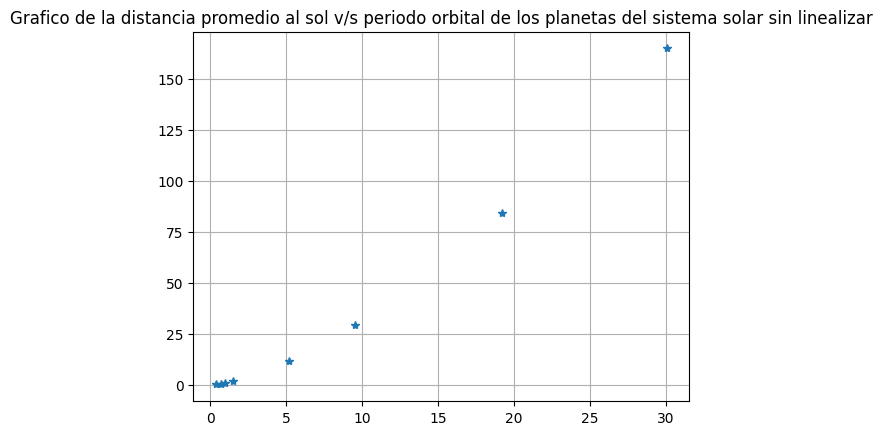

finish 83 iteration
[2.00512438 2.99728601 1.0340563 ]
1.4948130088033837
Error: 0.3457994131077502%


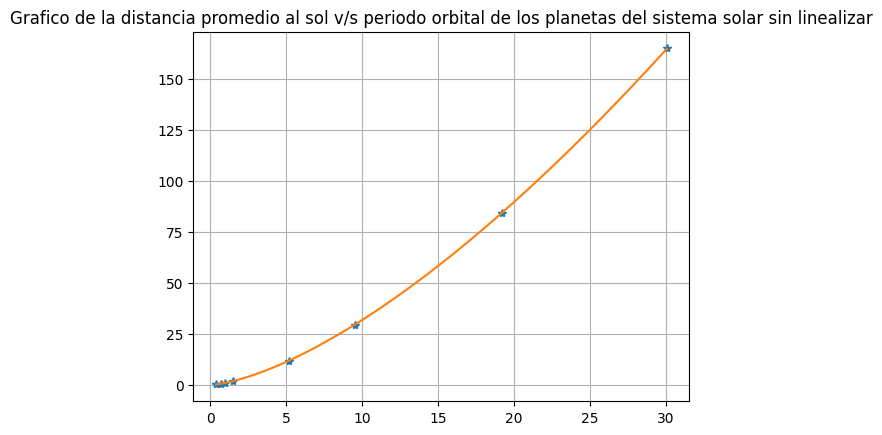

In [ ]:
T = np.array([0.2408467, 0.61519726, 1.0000174, 1.8808476, 11.862615, 29.447498, 84.016846, 164.79132])
R = np.array([0.387, 0.723, 1.000, 1.524, 5.203, 9.539, 19.182, 30.060])
plt.plot(R, T, '*')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar sin linealizar")
plt.grid()
plt.show()

f = lambda x: np.array([(x[2]*R[i]**x[1])**(1/x[0])-T[i] for i in range(len(T))])
x, sms = gauss_newton(f, np.array([2.01, 2.99, 1.01]), tol=0.00001, iter=100)
g = lambda y: (x[2]*y**x[1])**(1/x[0])
# f = lambda x: np.array([(x[0]*(R[i]**x[1]))-T[i] for i in range(len(T))])
# x, sms = gauss_newton(f, np.array([0.9, 1.6]), tol=0.00001, iter=1000)
# g = lambda y: x[0]*y**(x[1])
ba = x[1]/x[0]
print(x)
print(ba)

print(f"Error: {(abs(ba-1.5)/1.5)*100}%")


xx = np.linspace(R[0], R[-1], 1000)
plt.plot(R, T, '*')
plt.plot(xx, g(xx), '-')
plt.title("Grafico de la distancia promedio al sol v/s periodo orbital de los planetas del sistema solar sin linealizar")
plt.grid()
plt.show()